In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]

In [2]:
from sklearn.datasets import load_digits

In [3]:
dat = load_digits()

In [8]:
dat["data"].shape

(1797, 64)

In [9]:
dat["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
dat

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [17]:
dat["images"]

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [64]:
len(dat.feature_names)

64

4

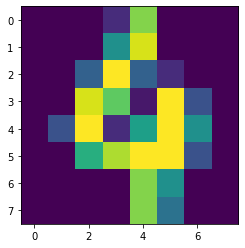

In [25]:
plt.imshow(dat["images"][100])
dat["target"][100]

3

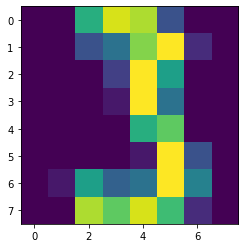

In [23]:
plt.imshow(dat["images"][60])
dat["target"][60]

In [32]:
X = pd.DataFrame(dat["data"], columns=dat["feature_names"])

In [41]:
y = pd.Series(dat["target"])

In [45]:
y.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

## 2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression

In [54]:
lrModel = LogisticRegression(max_iter = 10000)

In [55]:
lrModel.fit(train_x, train_y)

LogisticRegression(max_iter=10000)

In [56]:
predict_y = lrModel.predict(test_x)

In [58]:
lrModel.score(test_x, test_y)*100

94.44444444444444

## 3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]

In [59]:
from sklearn.decomposition import PCA

In [115]:
pcaModel = PCA(n_components=29)

In [116]:
tranformed_X= pcaModel.fit_transform(X)

In [117]:
tranformed_X[0]

array([-1.25946638, 21.27488353, -9.46305474, 13.01418805, -7.12881872,
       -7.4406572 ,  3.25285286,  2.55348292, -0.58185203,  3.62564566,
        2.58611136,  1.55153423,  0.85462543, -3.33861083,  5.90601987,
        2.74337734,  0.41907074, -0.89297999,  0.70384924, -3.45564428,
        2.6855345 ,  1.00037652,  2.00692834,  1.28291403,  1.19150485,
        2.32592248,  3.65764215, -0.84269954, -1.03695198])

In [118]:
pcaModel.explained_variance_ratio_*100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137258,  3.3532481 ,  3.07880621,
        2.37234084,  2.27269657,  1.82186331,  1.77385493,  1.46710107,
        1.40971554,  1.31858913,  1.2481359 ,  1.01771715,  0.90561558,
        0.88953741,  0.79711666,  0.76749077,  0.72288836,  0.69587801,
        0.59606061,  0.57558534,  0.51459324,  0.48921904])

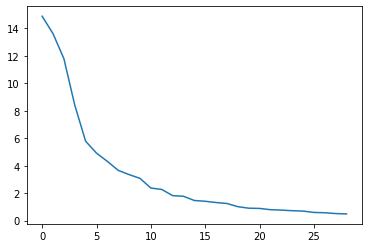

In [119]:
plt.plot(pcaModel.explained_variance_ratio_*100)

In [120]:
acc = []
temp = 0
for each in (pcaModel.explained_variance_ratio_*100):
    temp = each + temp
    acc.append(temp)

In [121]:
temp

95.47867636493939

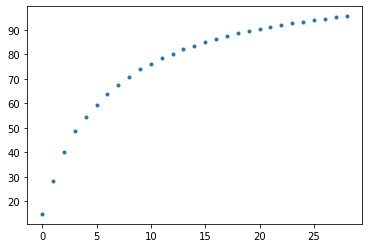

In [122]:
plt.plot(acc, '.')

## 4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]

In [123]:
train_transformed_x, test_transformed_x, train_y, test_y = train_test_split(tranformed_X, y, test_size=0.2)

In [124]:
lrModel = LogisticRegression(max_iter = 10000)

In [125]:
lrModel.fit(train_transformed_x, train_y)

LogisticRegression(max_iter=10000)

In [126]:
predict_y = lrModel.predict(test_transformed_x)

In [128]:
lrModel.score(test_transformed_x, test_y)*100

96.11111111111111

## We are able to get 96% accuracy with 29 components itself instead of 64 components

## 5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(test_y, predict_y)

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 42,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 32,  0,  0,  1,  1],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 35]], dtype=int64)